In [16]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 17 16:32:23 2022
#%% Execution
@author: Raziel
"""


import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm

# TTime = 0.05
N = 101
# N_t = 3
# Del_t = TTime / N_t
# alpha = 0.05
Lx = 1.0
Ly = 1.0
dx=Lx/(N-1)
dy=Ly/(N-1)

xx=[]
yy=[]
xx=np.linspace(0,Lx,N)
yy=np.linspace(0,Ly,N)
X,Y=np.meshgrid(xx,yy)


s=(N,N)
u=np.zeros(s)


for i in range(len(yy)):
      u[0,i]=(yy[i]**2-yy[i])/4

        
b=np.zeros(N*N)
A=np.zeros((N*N,N*N))

x=u.reshape(N*N)      

In [17]:

for j in range(0,N):  #looping along x axis
    for i in range(0,N):  #looping along y axis
        m = i*N+j
        # print(m)
        m_xn=(i-1)*N+j
        m_xp=(i+1)*N+j
        m_yn=i*N+(j-1)
        m_yp=i*N+(j+1)
        
        x[m]= ((yy[i]**2-yy[i])/4)      #Initial_Condition
           
        if  j==0:
            A[m,m]=1
            b[m]=2       #pressure is 2 on left boundary  
            # b[m]=x[m]      
            
        elif j==N-1:
            A[m,m]=1
            b[m]=0   #this should give P = 0 along P(1,y)
        
        elif i==0 or i==N-1:
            A[m,m]=1
            b[m]=0
        
        else:
            A[m,m_yn] = 1
            A[m,m_xn] = 1
            A[m,m] = -4
            A[m,m_xp] = 1
            A[m,m_yp] = 1
            
            b[m] = -(x[m_xp]-x[m])**2
    
x=np.linalg.solve(A,b)             #Solving for Pressure
    
P=x.reshape(N,N)   #convert to 2d


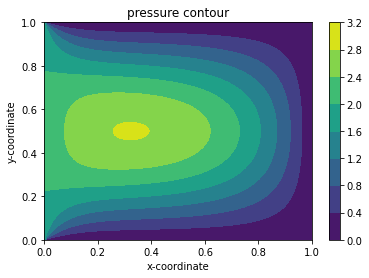

In [18]:

fig=plt.figure()
ax=plt.axes()
q=ax.contourf(X,Y,P)
plt.title('pressure contour')
# plt.legend()
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(q)
plt.show()


# fig=plt.figure()
# ax= plt.axes(projection = '3d')
# p = ax.plot_surface(X,Y,u) 
# plt.title('2D Diffusion')
# plt.show()


# fig = plt.figure()
# ax = fig.add_subplot(1,2,1,projection='3d')
# # surf = ax.plot_surface(X, Y, u[-1],cmap=cm.coolwarm)
# surf = ax.plot_surface(X, Y, u,cmap="jet")
# ax.set_xlabel('x-coordinate')
# ax.set_ylabel('y-coordinate')
# ax.set_zlabel('U velocity')
# ax.set_xlim(0,2)
# ax.set_ylim(0,2)
# # ax.set_zlim(0,2)